In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Model

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/train'  # Update with actual path
test_path = '/content/drive/MyDrive/test'  # Update with actual path
val_path = '/content/drive/MyDrive/val'  # Update with actual path

In [ ]:

#IMAGE_SIZE = [224, 224]

#train_path = r'../input/hair-diseases/Hair Diseases - Final/train'


#test_path = r'../input/hair-diseases/Hair Diseases - Final/test'
#val_path = r'../input/hair-diseases/Hair Diseases - Final/val'

# Define the CNN architecture


In [ ]:
inputs = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

# Create the model


In [ ]:
model = Model(inputs=inputs, outputs=outputs)

# Compile the model


In [ ]:

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(
    loss='categorical_crossentropy',
    optimizer=opt,
    metrics=["acc"]
)

# Print model summary


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,247,242 (84.87 MB)

 Trainable params: 22,247,242 (84.87 MB)

 Non-trainable params: 0 (0.00 B)

# Data augmentation and loading

In [ ]:


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)


training_set = train_datagen.flow_from_directory(
    directory=train_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)
test_set = test_datagen.flow_from_directory(
    directory=test_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)
val_set = val_datagen.flow_from_directory(
    directory=val_path,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

Found 9610 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1210 images belonging to 10 classes.


# Training the model


In [ ]:
history = model.fit(
    training_set,
    validation_data=val_set,
    #epochs=20,
    epochs=5,
    batch_size=128,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 3740s 25s/step - acc: 0.2877 - loss: 2.2472 - val_acc: 0.5587 - val_loss: 1.2409
Epoch 2/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1238s 8s/step - acc: 0.6786 - loss: 0.9188 - val_acc: 0.8248 - val_loss: 0.5276
Epoch 3/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1205s 8s/step - acc: 0.9120 - loss: 0.2756 - val_acc: 0.8736 - val_loss: 0.3885
Epoch 4/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1221s 8s/step - acc: 0.9601 - loss: 0.1354 - val_acc: 0.9281 - val_loss: 0.2546
Epoch 5/5
151/151 ━━━━━━━━━━━━━━━━━━━━ 1232s 8s/step - acc: 0.9728 - loss: 0.0882 - val_acc: 0.9347 - val_loss: 0.2489


# Save the model


In [ ]:
model.save("raw_cnn_model.h5")

# Save training history


In [ ]:
np.save('raw_cnn_history.npy', history.history)

# Evaluate the model on test set


In [ ]:
eval_result = model.evaluate(test_set)
test_loss, test_acc = eval_result[0], eval_result[1]
print(f'Test Accuracy: {test_acc * 100:.2f}%')
print(f'Test Loss: {test_loss:.4f}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 403s 22s/step - acc: 0.9568 - loss: 0.1913
Test Accuracy: 93.42%
Test Loss: 0.2920


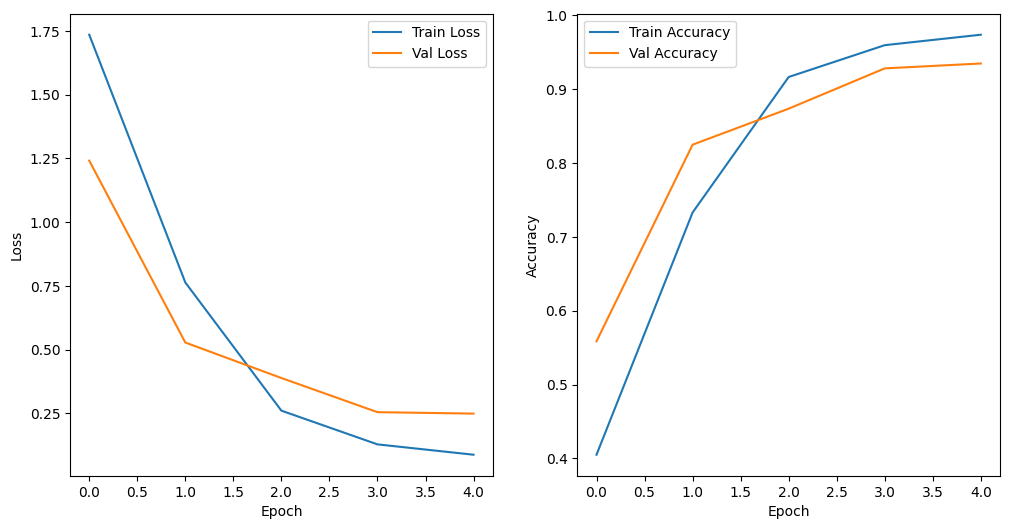

In [ ]:
# Plotting Loss & Accuracy Graphs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Found 1210 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step


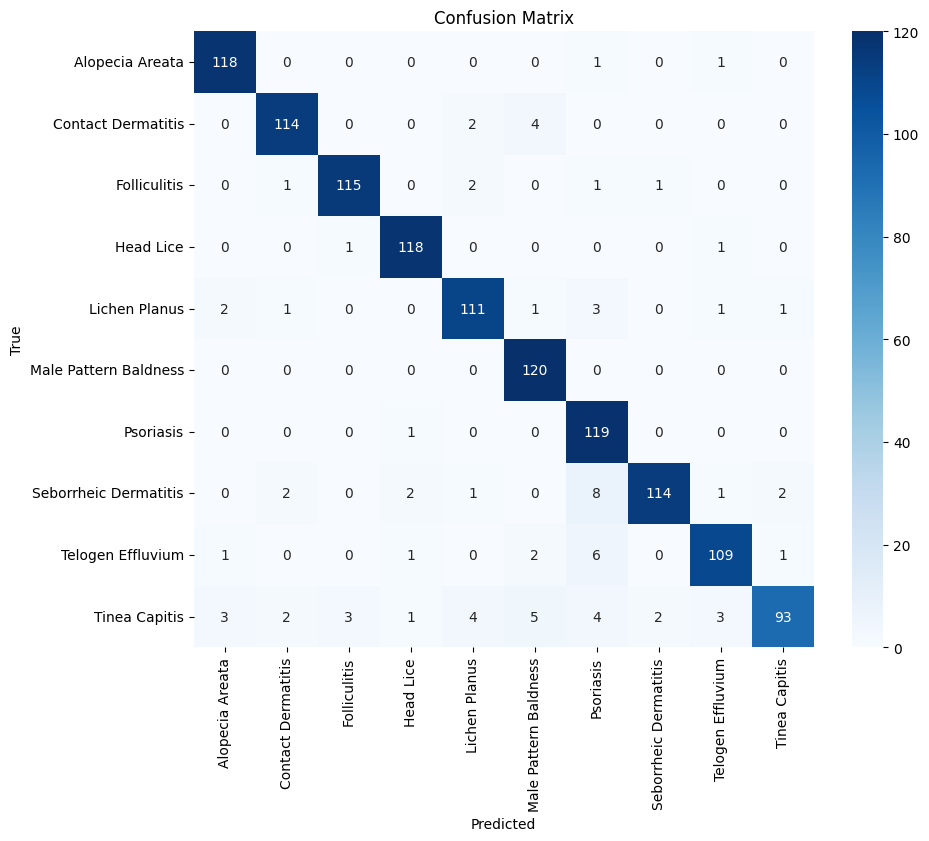

                       precision    recall  f1-score   support

      Alopecia Areata       0.95      0.98      0.97       120
   Contact Dermatitis       0.95      0.95      0.95       120
         Folliculitis       0.97      0.96      0.96       120
            Head Lice       0.96      0.98      0.97       120
        Lichen Planus       0.93      0.93      0.93       120
Male Pattern Baldness       0.91      1.00      0.95       120
            Psoriasis       0.84      0.99      0.91       120
Seborrheic Dermatitis       0.97      0.88      0.92       130
    Telogen Effluvium       0.94      0.91      0.92       120
        Tinea Capitis       0.96      0.78      0.86       120

             accuracy                           0.93      1210
            macro avg       0.94      0.94      0.93      1210
         weighted avg       0.94      0.93      0.93      1210



In [ ]:

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Prepare your validation or test data
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict the classes
Y_pred = model.predict(val_generator)


y_pred = np.argmax(Y_pred, axis=1)

# Get true labels
y_true = val_generator.classes

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
class_names = list(val_generator.class_indices.keys())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report (optional but useful)
print(classification_report(y_true, y_pred, target_names=class_names))
